In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import h5py
from math import pi

from analysis.config import birds, h5_path_dict
from analysis.ExpData import ExpData
from analysis.PlaceCalc import PlaceCalc
import analysis.mutual_info as mi
import analysis.shuffle as shuffle

In [ ]:
# for key in h5_path_dict.keys():
#     for fil in range(len(h5_path_dict[key])):
#         f = h5py.File(h5_path_dict[key][fil].as_posix(), 'r')
#         exp_data = ExpData(f)

In [2]:
f = h5py.File(h5_path_dict['LMN73'][1].as_posix(), 'r')
exp_data = ExpData(f)

# 1D Place Cell Calculation

In [9]:
place_calc = PlaceCalc(
    num_shuffles=200, threshold=0.99, dimension=1, bins_2d=None
    )
spatial_info, significance_1d = place_calc.calc_place_cells(exp_data)
num_sig = np.sum(significance)
print(f"{num_sig}/{exp_data.num_neurs} neurons significant.")

/home/chingf/Code/cache-arena-analysis/analysis/mutual_info.py:20: RuntimeWarning: invalid value encountered in true_divide
  log_term = np.log2(condn_mean_fr/mean_fr)


17/40 neurons significant.


In [ ]:
for neur in np.arange(significance.size):
    df = pd.DataFrame({
        "loc":exp_data.wedges[exp_data.wedges != 17],
        "spikerate":exp_data.fr[neur,exp_data.wedges != 17]
        })
    plt.figure(figsize=(10,5))
    sns.pointplot(x="loc", y="spikerate", data=df)
    if significance[neur]:
        plt.title("Place Cell")
    else:
        plt.title("Not Place Cell")
    plt.show()

# 2D Place Cell Calculation

In [10]:
place_calc = PlaceCalc(
    num_shuffles=100, threshold=0.99, dimension=2, bins_2d=20
    )
spatial_info, significance_2d = place_calc.calc_place_cells(exp_data)
num_sig = np.sum(significance)
print(f"{num_sig}/{exp_data.num_neurs} neurons significant.")

17/40 neurons significant.


In [5]:
from analysis.utils import gen_2d_bins
from scipy.stats import binned_statistic_2d

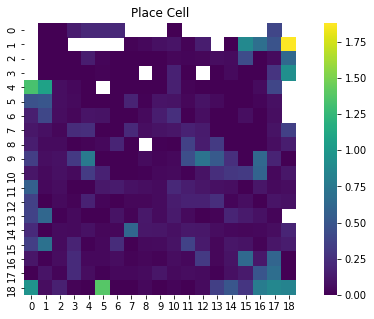

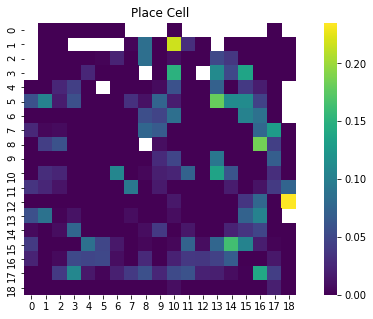

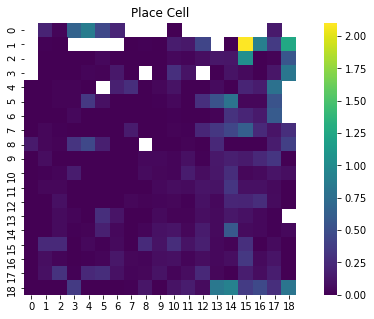

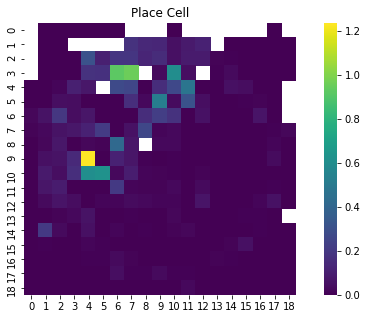

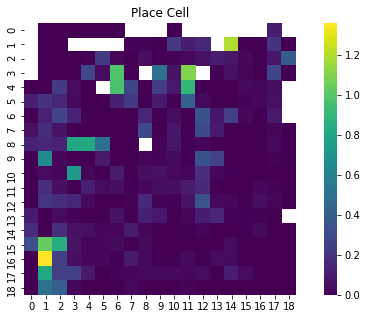

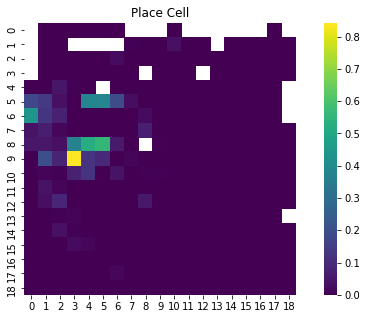

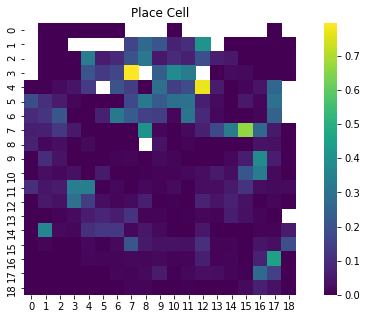

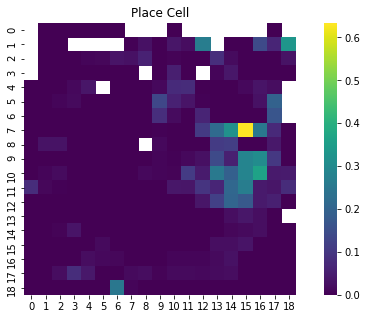

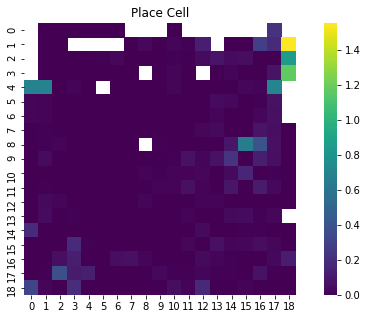

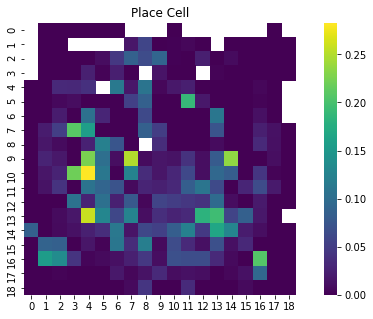

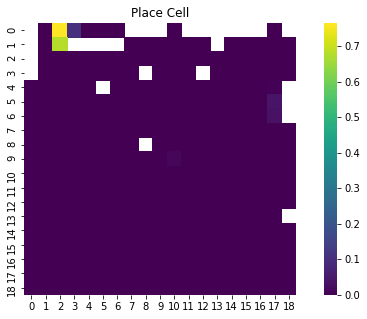

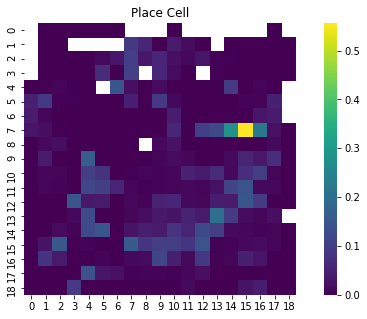

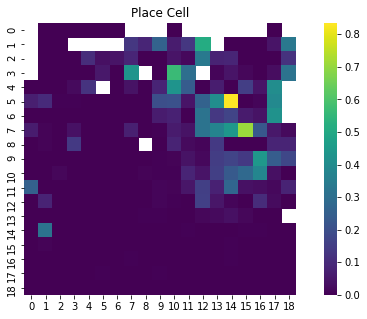

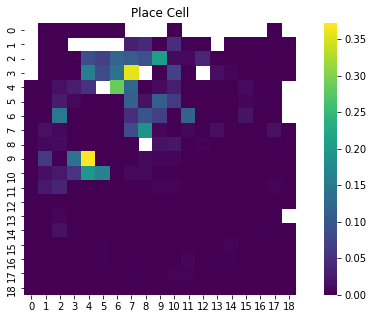

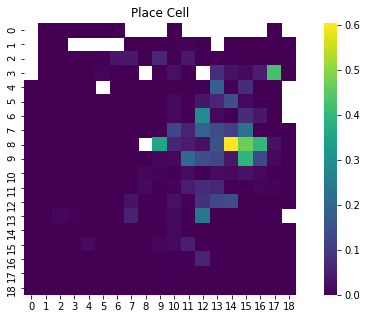

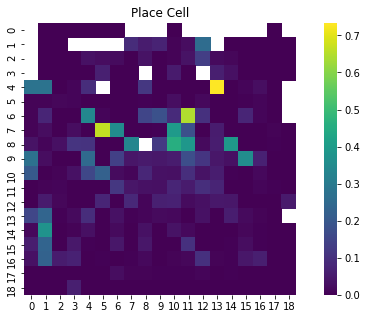

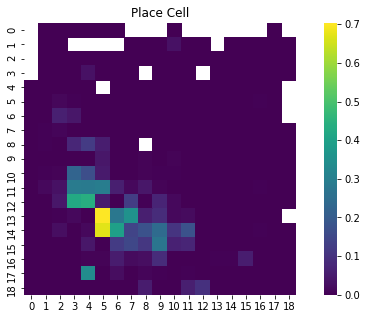

In [15]:
for neur in np.arange(significance.size):
    if not significance[neur]: continue
    mat, x_edge, y_edge, binnumber_2d = binned_statistic_2d(
        exp_data.x_loc, exp_data.y_loc, exp_data.fr[neur], 'mean',
        bins=np.linspace(0, 430, num=place_calc.bins_2d, endpoint=True),
        expand_binnumbers=True
        )
    plt.figure(figsize=(10,5))
    sns.heatmap(mat, cmap="viridis")
    if significance[neur]:
        plt.title("Place Cell")
    else:
        plt.title("Not Place Cell")
    plt.gca().set_aspect("equal")
    plt.show()